<a href="https://colab.research.google.com/github/dxda6216/bret_ca/blob/main/BRET_Calcium_DRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset
[Ca⁺⁺] (μM)	BRET Ratio
0.017000	1.000
0.017000	1.117
0.017000	1.194
0.065000	1.272
0.065000	1.355
0.065000	1.451
0.150000	1.962
0.150000	2.049
0.150000	2.120
0.351000	3.884
0.351000	3.881
0.351000	3.994
1.350000	8.955
1.350000	9.093
1.350000	9.178
39.000000	12.279
39.000000	12.556
39.000000	12.680

Parameters:
[ 1.04208807 12.5416949   1.44453188  0.75346701]

Parameter covariance matrix:
[[ 2.82156932e-03 -3.28132398e-04  1.02933030e-03  3.37998037e-04]
 [-3.28132398e-04  4.24898477e-03 -6.56993818e-04  4.55878389e-04]
 [ 1.02933030e-03 -6.56993818e-04  9.89823272e-04  1.64340897e-05]
 [ 3.37998037e-04  4.55878389e-04  1.64340897e-05  1.97144390e-04]] 

r-squared =  0.999498 



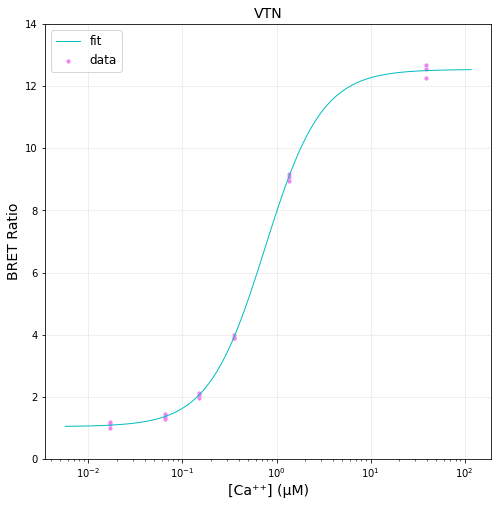

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Ca concentration vs. BRET ratio dose response curve
### curve fitting used in Cumberbatch et al. (2022)
###
### Carl Johnson Lab, Biological Sciences, Vanderbilt University
### PMB 351634, 2301 Vanderbilt Place, Nashville, Tennessee 37235-1634, USA
### https://as.vanderbilt.edu/johnsonlab/

### CTN data: xdata: Ca concentration in μM, ydata: Norm BRET ratio
# dataset_name = 'CTN'
# xdata = np.array([0.017, 0.017, 0.017, 0.065, 0.065, 0.065, 0.15, 0.15, 0.15, 0.351, 0.351, 0.351, 1.35, 1.35, 1.35, 39, 39, 39], dtype='float64')
# ydata = np.array([1, 1.023, 1.068, 1.439, 1.431, 1.454, 1.959, 2.122, 1.987, 3.017, 2.964, 2.866, 4.11, 4.06, 3.895, 4.989, 4.669, 4.631], dtype='float64')

### VTN data: xdata: Ca concentration in μM, ydata: Norm BRET ratio
dataset_name = 'VTN'
xdata = np.array([0.017, 0.017, 0.017, 0.065, 0.065, 0.065, 0.15, 0.15, 0.15, 0.351, 0.351, 0.351, 1.35, 1.35, 1.35, 39, 39, 39], dtype='float64')
ydata = np.array([1, 1.117, 1.194, 1.272, 1.355, 1.451, 1.962, 2.049, 2.12, 3.884, 3.881, 3.994, 8.955, 9.093, 9.178, 12.279, 12.556, 12.68], dtype='float64')

print(u'Dataset')
print (u'[Ca\u207a\u207a] (\u03bcM)\tBRET Ratio')
ycount = 0
for xseq in xdata:
	print('{:.6f}'.format(xseq)+'\t'+'{:.3f}'.format(ydata[ycount]))
	ycount += 1

#def func(x, a, b, c, d):
#    return a + (b/(1.0+np.exp(-c*(x+d))))

def func(x, a, b, c, d):
    return a + (b-a)/(1.0+(d/x)**c)

#def func(x, a, b, c, d):
#    return a + ((b-a)/(1.0+10**(-c*(np.log10(x)-np.log10(d)))))

### Try a different method if you get an error.
### method='lm' 'trf' or 'dogbox'
popt, pcov = curve_fit(func, xdata, ydata, method='trf')

xfmin = np.log10(min(xdata)*1/3)
xfmax = np.log10(max(xdata)*3)
xf = np.logspace(xfmin, xfmax, 100)
yf = func(xf, *popt)
ymax = round(max(max(ydata), max(yf))+1.0)

print(u'\nParameters:')
print(popt)
print(u'\nParameter covariance matrix:')
print(pcov, u'\n')

residuals = ydata- func(xdata, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - ( ss_residuals / ss_total )
print(u'r-squared = ', '{:.6f}'.format(r_squared), u'\n')

plt.figure(figsize=(8,8))
plt.plot(xf,yf,'-c', linewidth=1, label='fit')
plt.scatter(xdata, ydata, s=10.00, c='violet', label='data')

plt.grid(True, linewidth=0.5, color='lightgray', linestyle='--')
plt.legend(loc='upper left', fontsize=12)
plt.xscale("log")
plt.ylim(0,ymax)
plt.xlabel(u'[Ca\u207a\u207a] (\u03bcM)',fontsize=14)
plt.ylabel(u'BRET Ratio',fontsize=14)
plt.title(dataset_name, fontsize=14)
plt.show()
